# PROJECT:SBI LIFE INSURANCE

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('SBI_Life_insurance.csv')

In [3]:
#Lets see the first 5 rows of the data
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#Lets check the shape of the data
df.shape
# There are 7 features and 1 Target(insurance claim) and have 1338 rows

(1338, 8)

In [5]:
# Lets check the datatypes
df.dtypes 


age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [6]:
# Lets get more information about the data
df.info()
# Dont jump into any conclusion by the shown results
# Here sex, smoker,region and insuranceclaim are categorical although its indicating them as int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


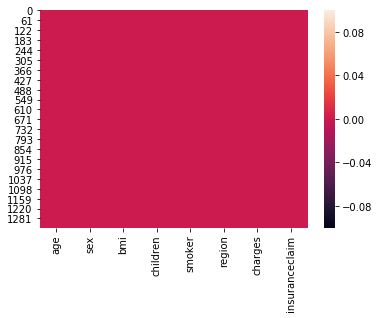

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# Great its showing no missing values

In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
# Lets see the descriptive statistics
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [10]:
#Lets see the correlation among the different features as well as with target
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


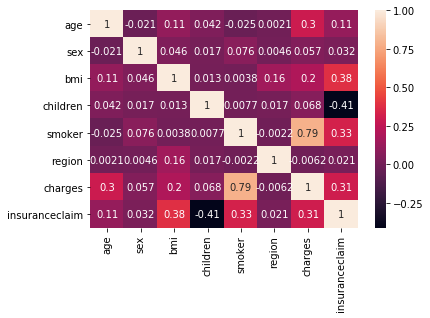

In [11]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004C465550F0>,
      dtype=object)

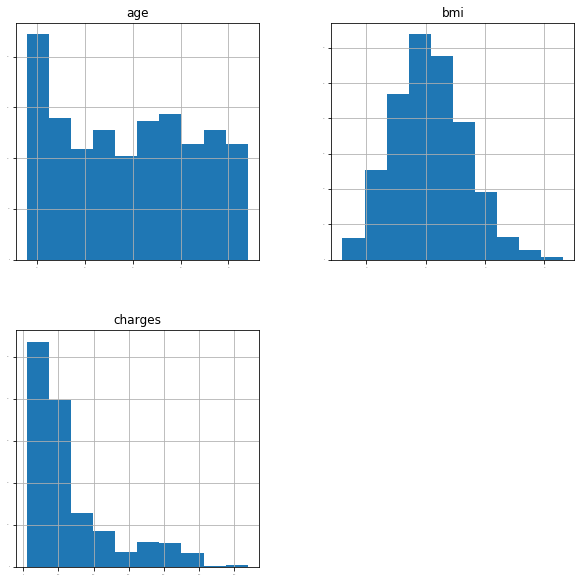

In [12]:
# Lets see the distributin of continuous variables
df[['age','bmi','charges']].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(10,10))
#we can clearly see charges is positively skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004C46744C18>,
      dtype=object)

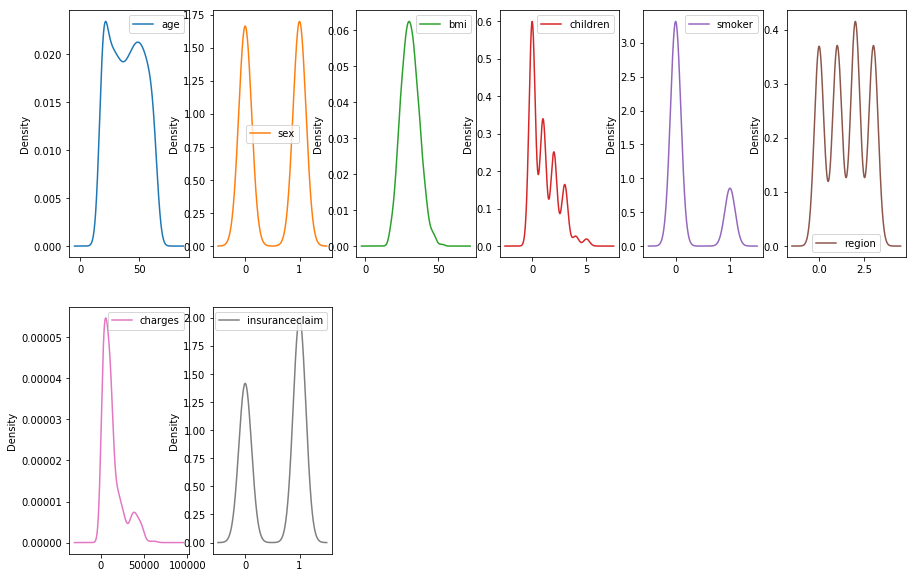

In [13]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(2,6), sharex=False, figsize=(15,10))

In [14]:
# Lets see insuranceclaim distribution
df['insuranceclaim'].value_counts()
# we can see that number of persons who have made claim are more than who have not

1    783
0    555
Name: insuranceclaim, dtype: int64

In [15]:
# Lets see how many males and Females are there in dataset
df['sex'].value_counts()
# 676 Males and 662 Females

1    676
0    662
Name: sex, dtype: int64

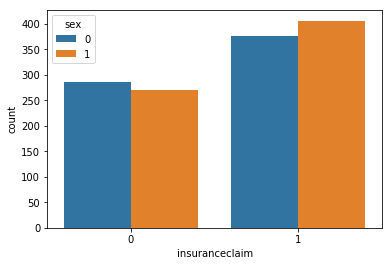

In [16]:
# Let us explore on the basis of gender who have claimed more
sns.countplot(df['insuranceclaim'],hue=df['sex'])
 

In [17]:
# Lets visualize the above information with the help of table
pd.crosstab(df['sex'],df['insuranceclaim'])
#we can clearly see out of 676 males 406 have claimed while from among 662 females 377 have claimed which mean males have higher chances of claiming
# so we can say if a customer is male he has little more chance to claim than female customer

insuranceclaim,0,1
sex,,
0,285,377
1,270,406


In [18]:
# Lets see how many smokers  and nonsmokers are there in dataset
df['smoker'].value_counts()
# one postive thing which is great to see less number of smokers among total data

0    1064
1     274
Name: smoker, dtype: int64

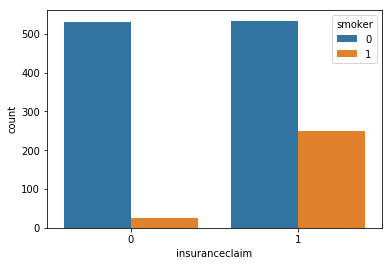

In [19]:
# Let us explore on the basis of smoker or nonsmoker who have claimed more
sns.countplot(df['insuranceclaim'],hue=df['smoker'])

In [20]:
# Lets visualize the above information with the help of table
pd.crosstab(df['smoker'],df['insuranceclaim'])
# We can clearly see that if a person smokes he/she has higher chances of claiming insurance

insuranceclaim,0,1
smoker,,
0,530,534
1,25,249


In [21]:
# Lets see how many people are there from different regions
df['region'].value_counts()
# Allmost equally distributed except few more from region 2

2    364
3    325
1    325
0    324
Name: region, dtype: int64

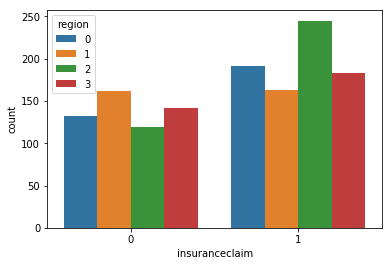

In [22]:
# Let us explore on the basis of region who have claimed more
sns.countplot(df['insuranceclaim'],hue=df['region'])

In [23]:
# Lets visualize the above information with the help of table
pd.crosstab(df['region'],df['insuranceclaim'])
# We can clearly see that if a person is from region 2, he/she has higher chances of claiming insurance and from region 1 has least

insuranceclaim,0,1
region,,
0,132,192
1,162,163
2,119,245
3,142,183


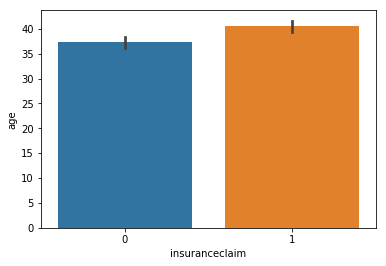

In [24]:
#Lets explore relationship between age and insurance claim
sns.barplot(x=df['insuranceclaim'], y=df['age'])
# The mean age of the claimies are little bit more than non claimies  

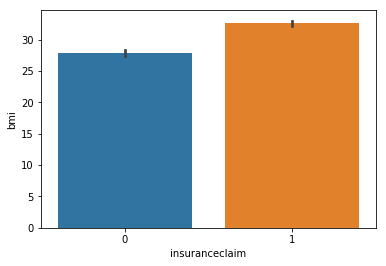

In [25]:
#Lets explore relationship between bmi and insurance claim
sns.barplot(x=df['insuranceclaim'], y=df['bmi'])
# we can see the persons with higher bmi have more chances of claiming insurance 

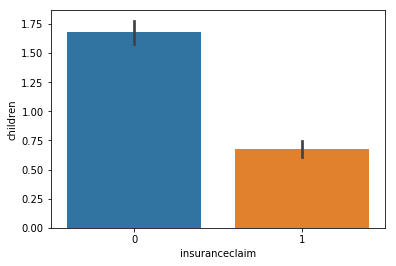

In [26]:
#Lets explore relationship between children and insurance claim
sns.barplot(x=df['insuranceclaim'], y=df['children'])
# we can see the persons with more childrens have less chances of claiming insurance 

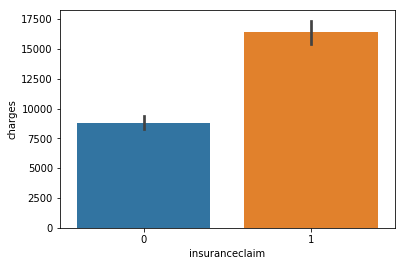

In [27]:
#Lets explore relationship between charges and insurance claim
sns.barplot(x=df['insuranceclaim'], y=df['charges'])
# we can see the persons who claims for life insurance usually pay more charges

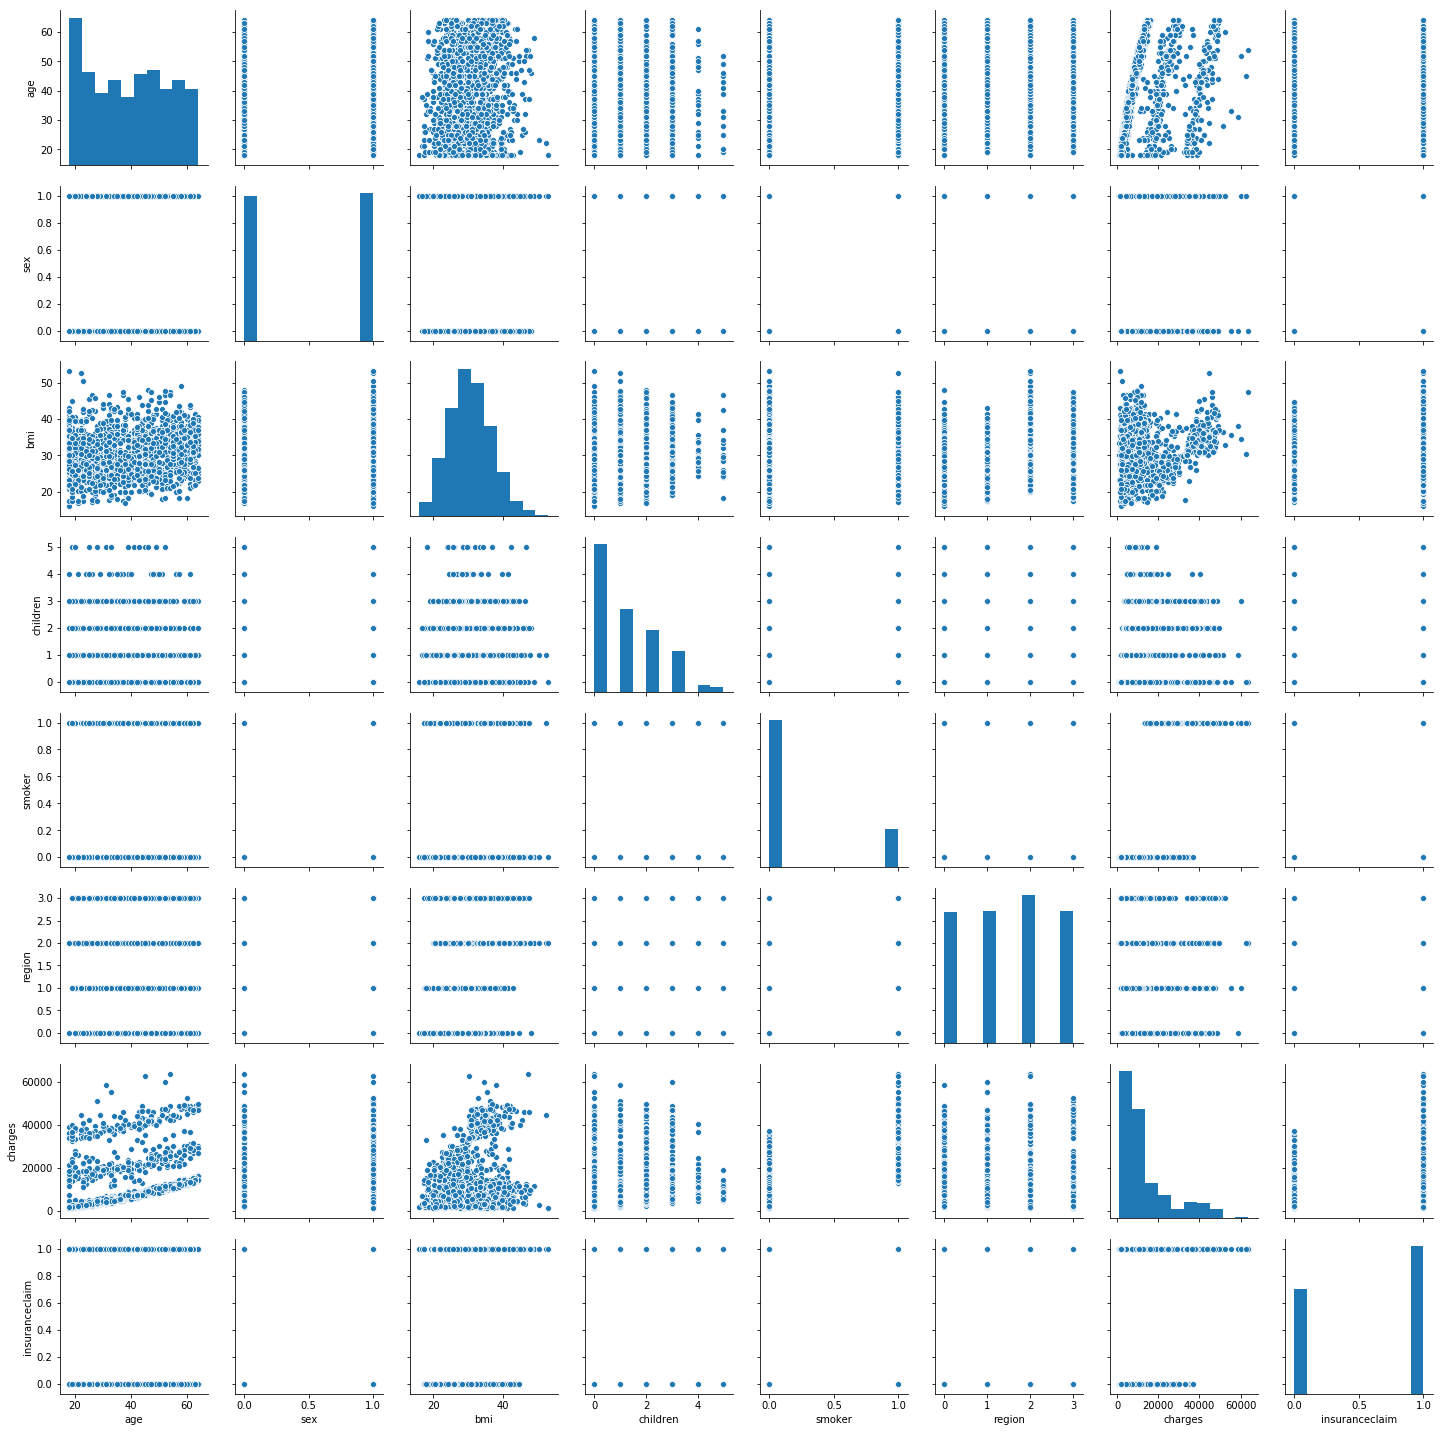

In [29]:
#Lets visualize the relation among all with each other
sns.pairplot(df)

In [30]:
#Lets check skewness in data
df.skew()
# there are few variables have skewness not in acceptable range those are postively skewed

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [31]:
# Let us remove the Skewness
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [32]:
#lets again check the skewness
df.skew()
# Skewness seems in control except the smoker variable which is a categorical variable 

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [33]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfnew = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfnew.shape)
#there were four outliers which have been removed

The shape of original dataframe was = (1338, 8)
The shape of dataframe after removing outliers is = (1334, 8)


In [34]:
# Let us seperate the features and Target
x=dfnew.drop(['insuranceclaim'],axis=1)    
y=dfnew[['insuranceclaim']]

In [35]:
#lets see first 5 rows of x1
x.head()
# x now contains only features

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455


In [36]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [37]:
#As it is a classification problem lets import require metrics from  libraries
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [38]:
# Lets select few of the models to evaluate which one perform well on the given data
#Lets import some base models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [39]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=5))])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))




In [40]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# WE CAN CLEARLY SEE DECISION TREE IS OUTPERFORMING OTHER CLASSIFIERS WITH ACCURACY OF 0.985 AND STANDARD DEVIATION OF 0.012

LR: 0.870318 (0.023207)
LDA: 0.868068 (0.025337)
KNN: 0.885305 (0.017417)
DT: 0.985002 (0.014245)
NB: 0.793149 (0.031565)
SVM: 0.900320 (0.016645)


In [41]:
#lets  see if any of the three chosen ensemble technique  with default paramters can give improved accuracy
#By default they work on decision tree as as base estimator so scaling is not mandatory
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
ensemble = [('RF', RandomForestClassifier(random_state=5)),('ADC',AdaBoostClassifier(random_state=5)),('GBC',GradientBoostingClassifier(random_state=5,))]
results1 = []
names1 = []
for name, model in ensemble: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results1.append(cv_results1) 
    names1.append(name) 
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)                                              


RF: 0.937005 (0.020283)
ADC: 0.853838 (0.034758)
GBC: 0.980490 (0.013120)


In [42]:
# We can see that  Gradient Boosting and Random forest classfiers are performing well on cross validation
# Decision tree is giving accuracy of 0.985 and Gradient boosting is giving 0.98
# Gradient boosting can be a good choice if we do hyperparamter tuning
# But lets select decision tree classifier as it is a simpler model and giving GOOD cross val score 
# Simpler model will be less resource hungry


In [43]:
#Lets try to check if  cross val performance of DT can be increased by changing parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1) 
min_samples_split = [2, 3, 4, 5]
min_samples_leaf= [1,2,3,4]
param_grid = dict(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
mod = DecisionTreeClassifier(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='accuracy', cv=kfoldx,n_jobs=-1)
grid_result = grid.fit(x, y)

In [44]:
grid_result.best_score_

0.9850074962518741

In [45]:
grid_result.best_params_ 

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [46]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [47]:
#Lets find out the best random state for selected decision tree classsifier
# Scaling is not mandatory as DT is not a distance based algo
max_accuracy=0
dt= DecisionTreeClassifier(random_state=5)
for i in range(10,60):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i, stratify =y)
    dt.fit(X_train,y_train)
    ypreds=dt.predict(X_test)
    accuracy=accuracy_score(y_test, ypreds)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  10 the value of accuracy is  0.9812734082397003
At random state  11 the value of accuracy is  0.9925093632958801
At random state  12 the value of accuracy is  0.9850187265917603
At random state  13 the value of accuracy is  0.9812734082397003
At random state  14 the value of accuracy is  0.9625468164794008
At random state  15 the value of accuracy is  0.9887640449438202
At random state  16 the value of accuracy is  0.9737827715355806
At random state  17 the value of accuracy is  0.9812734082397003
At random state  18 the value of accuracy is  0.951310861423221
At random state  19 the value of accuracy is  0.9700374531835206
At random state  20 the value of accuracy is  0.9288389513108615
At random state  21 the value of accuracy is  0.9588014981273408
At random state  22 the value of accuracy is  0.9850187265917603
At random state  23 the value of accuracy is  0.9400749063670412
At random state  24 the value of accuracy is  0.9737827715355806
At random state  25 the va

In [48]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 26,stratify=y)
dtf= DecisionTreeClassifier(random_state=5)
dtf.fit(X_train,y_train)
ypred=dtf.predict(X_test)
accuracy= accuracy_score(y_test,ypred)
print('accuracy is', accuracy)

accuracy is 1.0


In [49]:
#Lets check our training accuracy
trainaccuracy = dtf.score(X_train,y_train)
trainaccuracy
# Here clearly train accuracy = test accuracy so our model is generalized model

1.0

observation : We can see that our model is genralized model a training accuracy = test accuracy
            : cross val score is also good 98.42


In [50]:
#Lets once again verify its  cross val  accuracy score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(DecisionTreeClassifier(random_state=5),x,y,cv=kfoldx,scoring="accuracy").mean()

0.9850016833127594

In [51]:
# Lets save the predicted result to a csv file
dfx = pd.DataFrame(ypred,columns=['Predicted_values'])
dfx.to_csv('dt_prediction.csv')

In [52]:
#Lets print the confusion matrix
print('confusion matrix = ',confusion_matrix(y_test,ypred))

confusion matrix =  [[111   0]
 [  0 156]]


In [53]:
#Lets print the classification report
print('classification report = ',classification_report(y_test,ypred))

classification report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       156

   micro avg       1.00      1.00      1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



AUC: 1.000


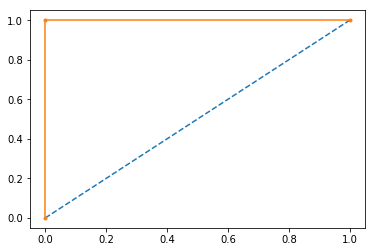

In [54]:
# calculate AUC
auc = roc_auc_score(y_test, ypred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [55]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(dtf,'DT_SBI.pkl')

['DT_SBI.pkl']